In [2]:
# Module-1 Statistical segmentation (RFM segmentation)
#computing RFM segment
setwd("D:/Dropbox/Data Science and Analytics/ESSEC-Strategic Business Analytics/Marketing Analytics")
data=read.delim(file="purchases.txt",header=FALSE, sep='\t',dec='.')
colnames(data)=c('customer_id','purchase_amount','date_of_purchase')
data$date_of_purchase=as.Date(data$date_of_purchase,'%Y-%m-%d')
data$days_since=as.numeric(difftime(time1="2016-01-01",time2=data$date_of_purchase,units="days"))
#display the data after transformation
head(data)

customer_id,purchase_amount,date_of_purchase,days_since
760,25,2009-11-06,2246.7708
860,50,2012-09-28,1189.7708
1200,100,2005-10-25,3719.7708
1420,50,2009-07-09,2366.7708
1940,70,2013-01-25,1070.7708
1960,40,2013-10-29,793.7708


In [3]:
summary(data)
fix(data)

  customer_id     purchase_amount   date_of_purchase       days_since      
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :   0.771  
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.: 732.771  
 Median :102440   Median :  30.00   Median :2011-11-23   Median :1499.771  
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :1631.710  
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2539.771  
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :4015.771  

Warning message:
"class discarded from column 'date_of_purchase'"

In [10]:
library(sqldf)
#computing RFM values
customers=sqldf("select customer_id , min(days_since) as recency, count(*) as frequency, avg(purchase_amount) as amount
from data
group by 1")

In [13]:
#explore the data
head(customers)
summary(customers)

customer_id,recency,frequency,amount
10,3828.7708,1,30.00000
80,342.7708,7,71.42857
90,757.7708,10,115.80000
120,1400.7708,1,20.00000
130,2969.7708,2,50.00000
160,2962.7708,2,30.00000


  customer_id        recency           frequency          amount       
 Min.   :    10   Min.   :   0.771   Min.   : 1.000   Min.   :   5.00  
 1st Qu.: 81990   1st Qu.: 243.771   1st Qu.: 1.000   1st Qu.:  21.67  
 Median :136430   Median :1069.771   Median : 2.000   Median :  30.00  
 Mean   :137574   Mean   :1252.809   Mean   : 2.782   Mean   :  57.79  
 3rd Qu.:195100   3rd Qu.:2129.771   3rd Qu.: 3.000   3rd Qu.:  50.00  
 Max.   :264200   Max.   :4013.771   Max.   :45.000   Max.   :4500.00  

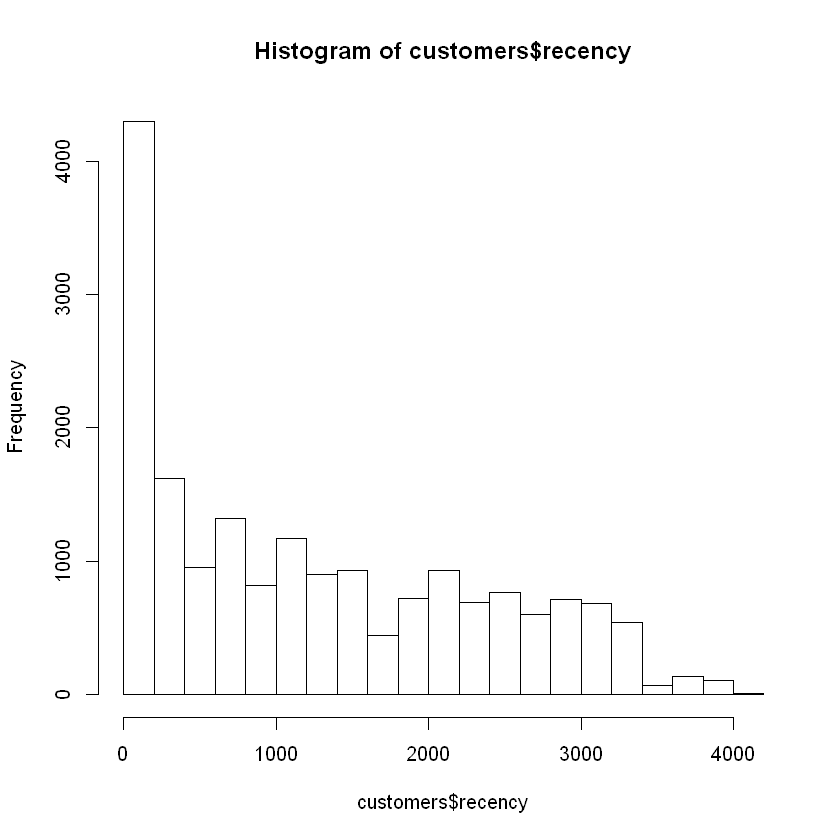

In [6]:
#distribution of customers data
hist(customers$recency)

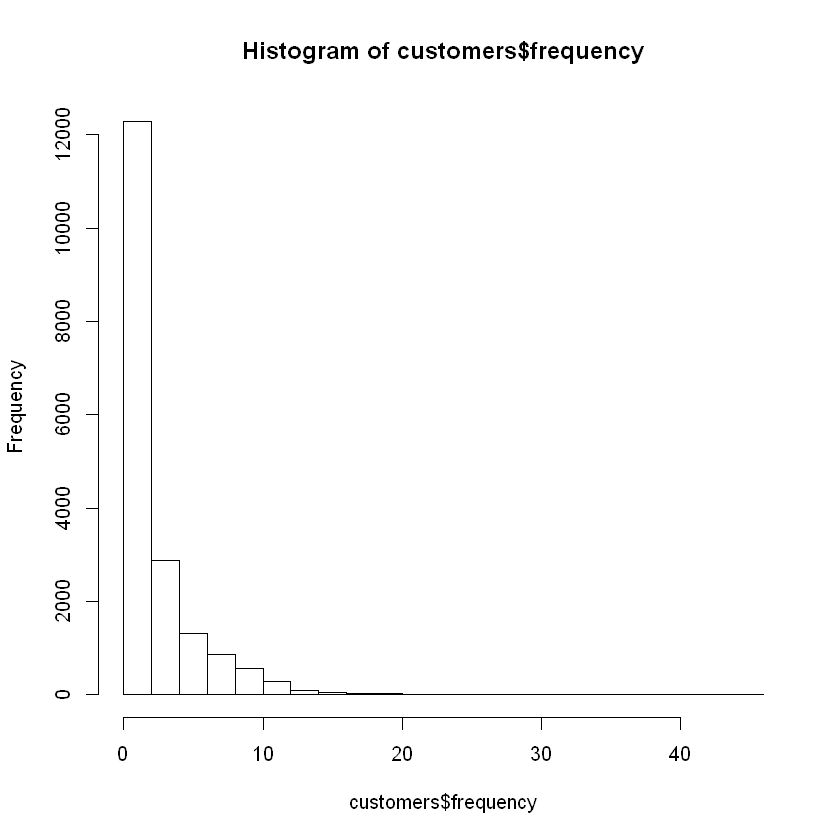

In [7]:
hist(customers$frequency)

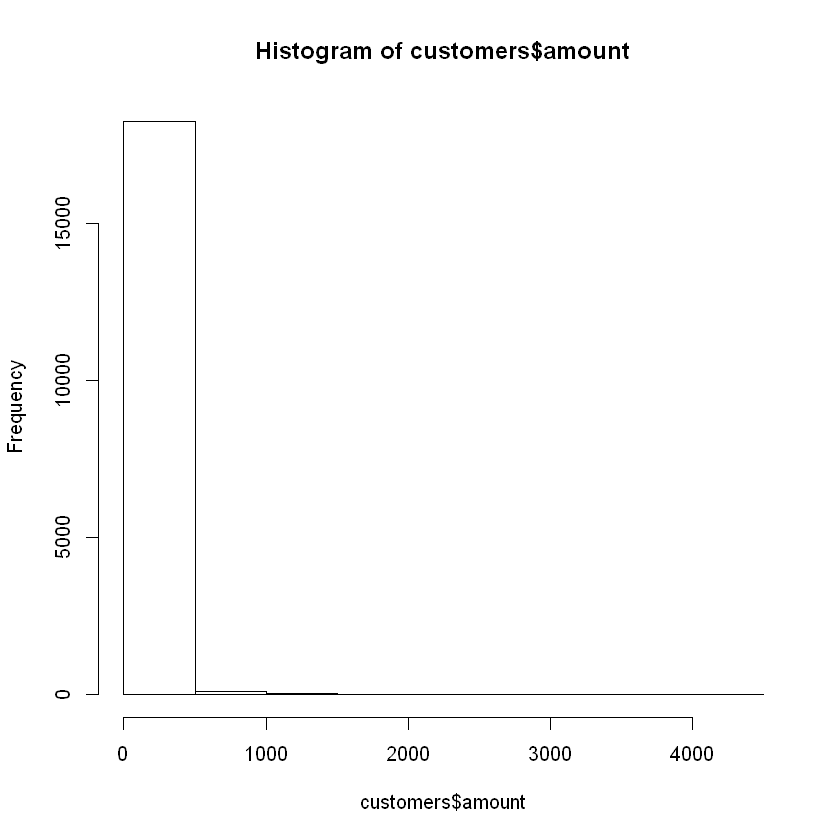

In [11]:
hist(customers$amount)

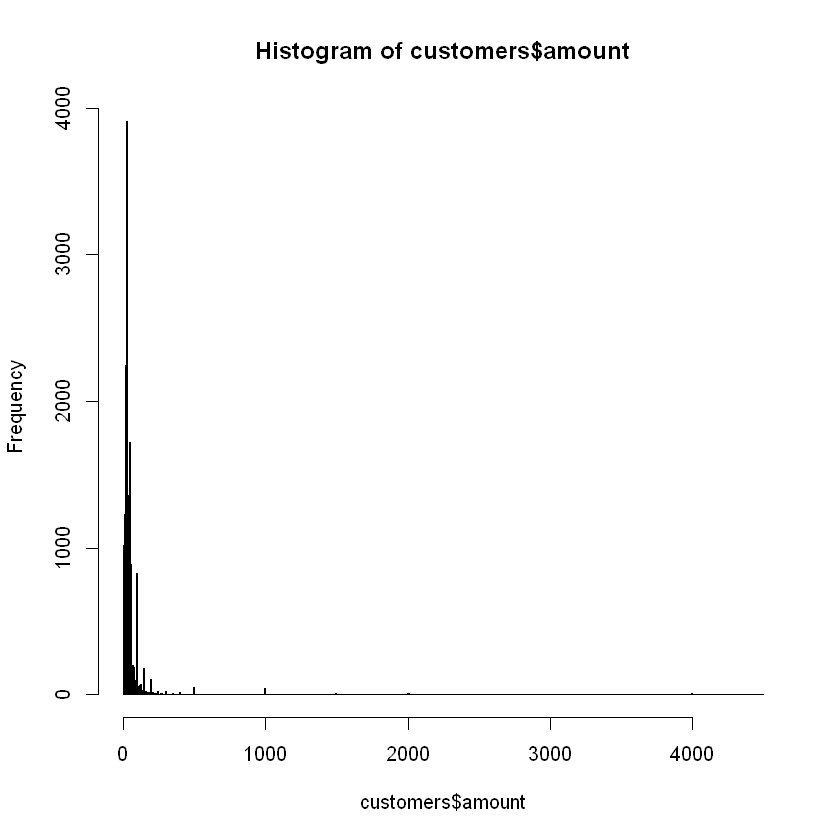

In [12]:
hist(customers$amount, breaks=1000)

In [14]:
#Data transformation- standardizatio (x-mean)/sd
new_data=customers
head(new_data)


customer_id,recency,frequency,amount
10,3828.7708,1,30.00000
80,342.7708,7,71.42857
90,757.7708,10,115.80000
120,1400.7708,1,20.00000
130,2969.7708,2,50.00000
160,2962.7708,2,30.00000


In [15]:
row.names(new_data)=new_data$customer_id

In [16]:
new_data$customer_id=NULL
head(new_data)

,recency,frequency,amount
10,3828.7708,1,30.00000
80,342.7708,7,71.42857
90,757.7708,10,115.80000
120,1400.7708,1,20.00000
130,2969.7708,2,50.00000
160,2962.7708,2,30.00000


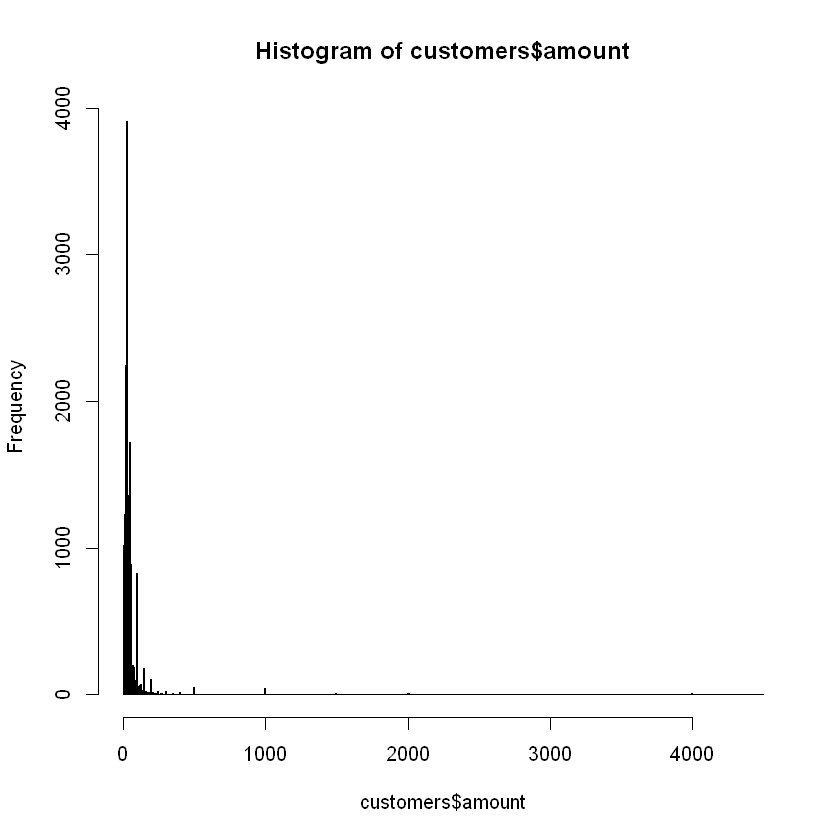

In [18]:
new_data$amount=log(new_data$amount)

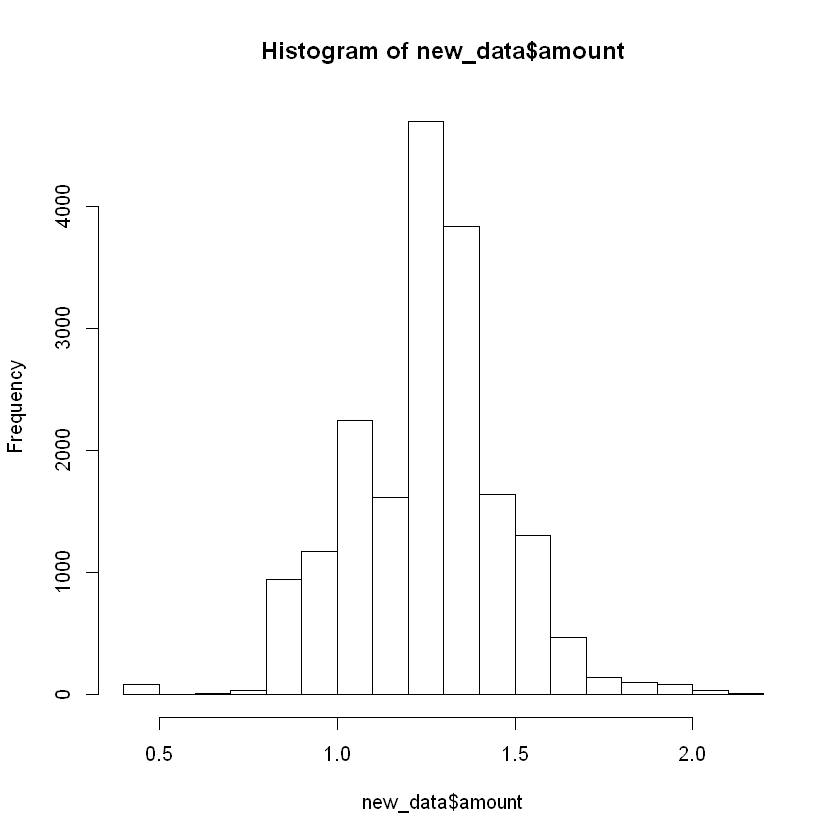

In [20]:
hist(new_data$amount)

In [21]:
#standardising the new_data variables
new_data=scale(new_data)
head(new_data)

,recency,frequency,amount
10,2.3819788,-0.6068923,-0.1457031
80,-0.8415073,1.4360863,0.9504280
90,-0.4577590,2.4575756,1.4677954
120,0.1368198,-0.6068923,-0.7581726
130,1.5876660,-0.2663959,0.5294336
160,1.5811931,-0.2663959,-0.1457031


In [22]:
#running a hierarchical segmentation

sample=seq(1,18417,by=10)
head(sample)

[1]  1 11 21 31 41 51

In [23]:
customer_sample=customers[sample,]
new_data_sample=new_data[sample,]

In [ ]:
#compute distance matrix 